## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [316]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [317]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_df = pd.read_csv(
    Path('../Resources/bitstamp.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [318]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [319]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_df = pd.read_csv(
    Path('../Resources/coinbase.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

In [320]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase_df.tail())
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [321]:
#Checking how many N/A's exist before removing
print("bitstamp N/A count:")
display(bitstamp_df.isna().sum())


bitstamp N/A count:


Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [322]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp_df.dropna(inplace=True)

# Checking that all the N/As have been removed
print("bitstamp N/A count:")
display(bitstamp_df.isna().sum())

bitstamp N/A count:


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [323]:
# Use the str.replace function to remove the dollar sign, $
bitstamp_df.loc[:,"Close"] = bitstamp_df.loc[:,"Close"].str.replace("$","")

# Check that the "$" was replaced with a blank i.e. was removed
bitstamp_df

C:\Users\Gabe\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 3: Convert the data type of the Close column to a `float`.

In [324]:
# Convert the Close data type to a float
bitstamp_df.loc[:,"Close"] = bitstamp_df.loc[:,"Close"].astype("float")

# Check that the type was properly converted from string/object to float
bitstamp_df.loc[:,"Close"].dtype

dtype('float64')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [325]:
# Review the data for duplicate values, and drop them if necessary
bitstamp_df.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [326]:
#Checking how many N/A's exist before removing
print("coinbase N/A count:")
display(coinbase_df.isna().sum())

coinbase N/A count:


Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [327]:
# For the coinbase DataFrame, we replace or drop all NaNs or missing values in the DataFrame
coinbase_df.dropna(inplace=True)

# Checking that all the N/As have been removed
print("coinbase N/A count:")
display(coinbase_df.isna().sum())

coinbase N/A count:


Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [328]:
# Use the str.replace function to remove the dollar sign, $
coinbase_df.loc[:,"Close"] = coinbase_df.loc[:,"Close"].str.replace("$","")

# Check that the "$" was replaced with a blank i.e. was removed
coinbase_df.head()

C:\Users\Gabe\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [329]:
# Convert the Close data type to a float
coinbase_df.loc[:,"Close"] = coinbase_df.loc[:,"Close"].astype("float")

# Check that the type was properly converted from string/object to float
coinbase_df.loc[:,"Close"].dtype

dtype('float64')

In [330]:
# Review the data for duplicate values, and drop them if necessary
print("Number of duplicates in coinbase:")
display(coinbase_df.duplicated().sum())
# You can run the code below if duplicates do appear:
# print("Number of duplicates in coinbase after dropping duplicates:")
# coinbase_df.drop_duplicates(inplace=True)
# display(coinbase_df.duplicated().sum())

Number of duplicates in coinbase:


0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [331]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [332]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase_df.loc[:,'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [333]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [334]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Closing price of BTC on Bitstamp'}, xlabel='Timestamp'>

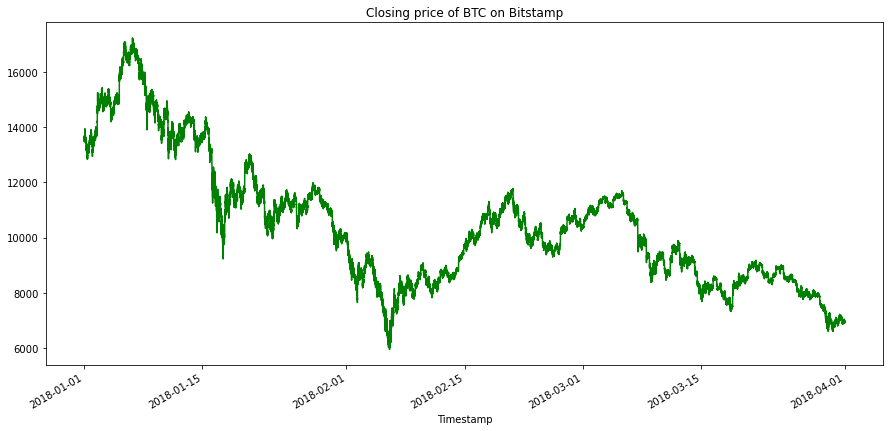

In [335]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(figsize = (15,7),color = "green", title = "Closing price of BTC on Bitstamp")

<AxesSubplot:title={'center':'Closing price of BTC on Coinbase'}, xlabel='Timestamp'>

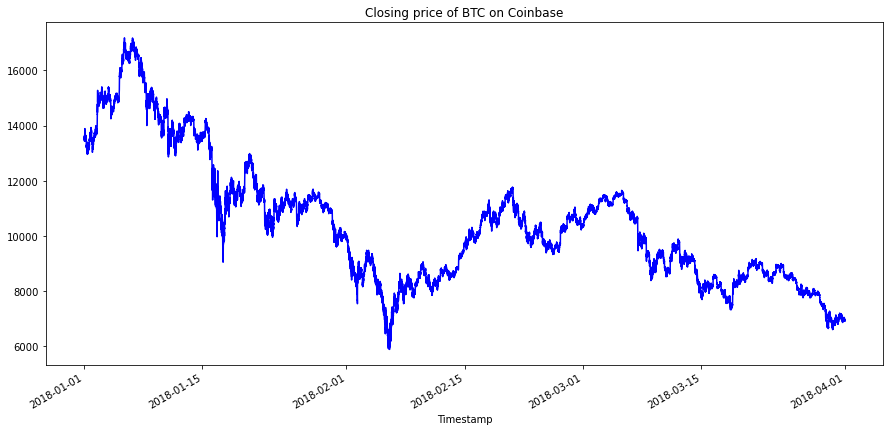

In [336]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(figsize = (15,7),color = "blue", title = "Closing price of BTC on Coinbase")

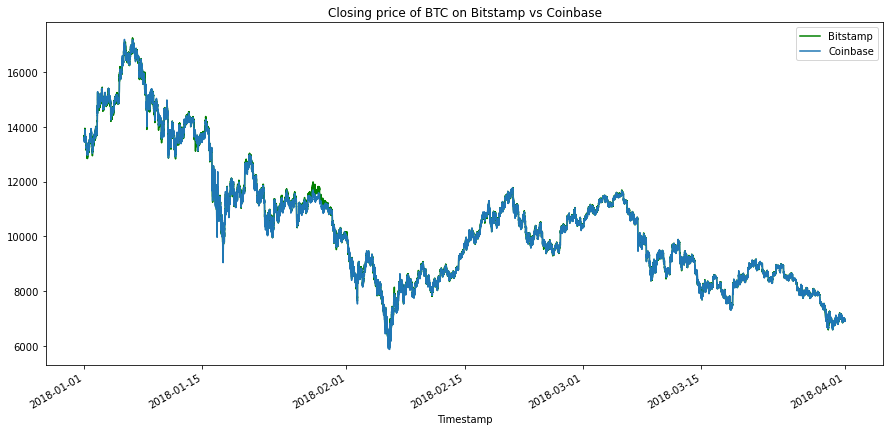

In [337]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.plot(figsize = (15,7),color = "green", title = "Closing price of BTC on Bitstamp vs Coinbase")

coinbase_sliced.plot(ax=ax)

ax.legend(['Bitstamp','Coinbase'])

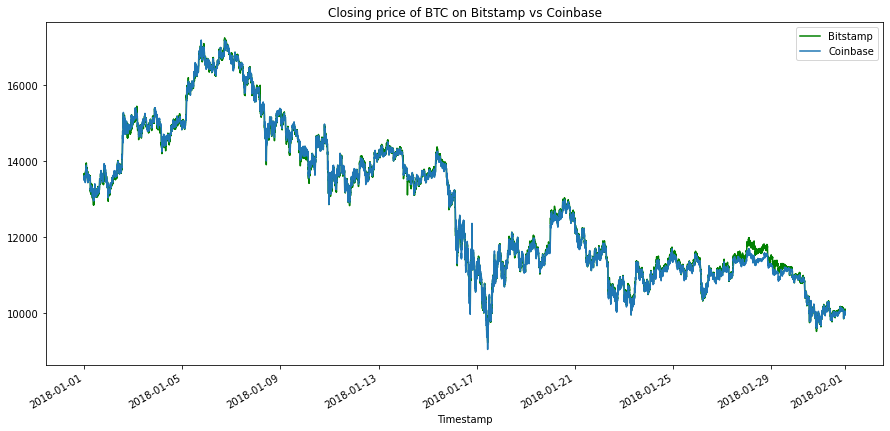

In [338]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
ax = bitstamp_sliced.loc['2018-01-01':'2018-01-31'].plot(figsize = (15,7),color = "green", title = "Closing price of BTC on Bitstamp vs Coinbase")

coinbase_sliced.loc['2018-01-01':'2018-01-31'].plot(ax=ax)

ax.legend(['Bitstamp','Coinbase'])

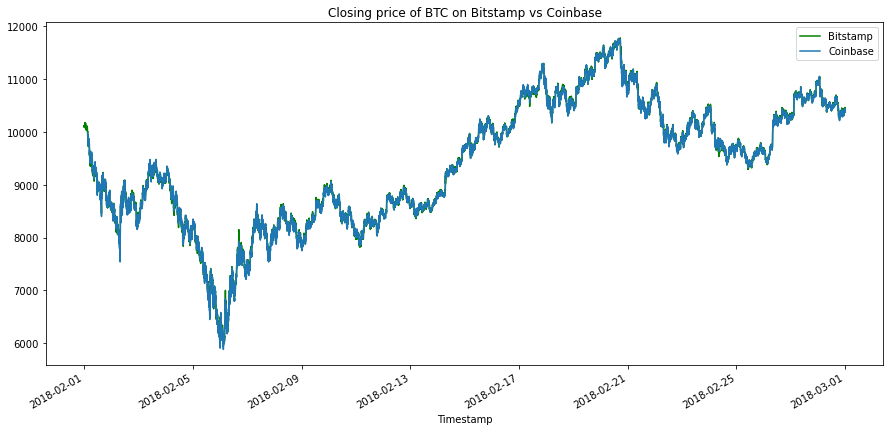

In [339]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
ax = bitstamp_sliced.loc['2018-02-01':'2018-02-28'].plot(figsize = (15,7),color = "green", title = "Closing price of BTC on Bitstamp vs Coinbase")

coinbase_sliced.loc['2018-02-01':'2018-02-28'].plot(ax=ax)

ax.legend(['Bitstamp','Coinbase'])

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It appears that the spread has decreased over time. This makes sense since as people profit off arbitrage, the arbitrage goes away.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

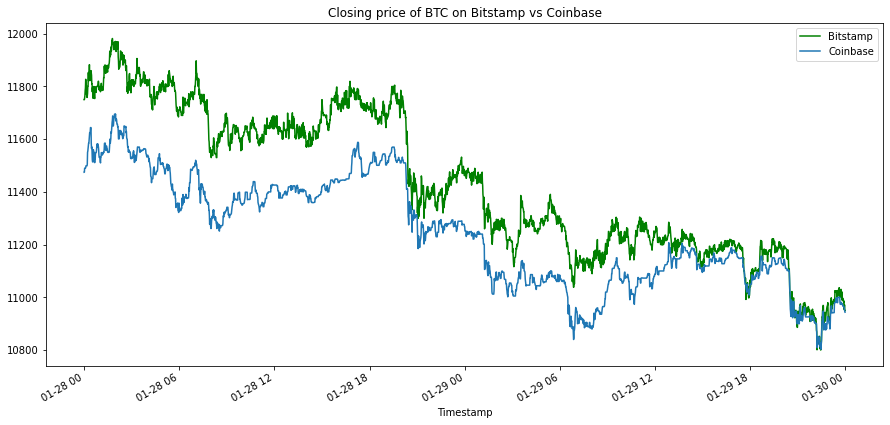

In [340]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-01-28':'2018-01-29'].plot(figsize = (15,7),color = "green", title = "Closing price of BTC on Bitstamp vs Coinbase")

coinbase_sliced.loc['2018-01-28':'2018-01-29'].plot(ax=ax)

ax.legend(['Bitstamp','Coinbase'])

In [341]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp_sliced.loc['2018-01-28':'2018-01-29'] - coinbase_sliced.loc['2018-01-28':'2018-01-29']

display(arbitrage_spread_early)
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-29 23:55:00     23.62
2018-01-29 23:56:00     -7.29
2018-01-29 23:57:00     18.31
2018-01-29 23:58:00      2.39
2018-01-29 23:59:00      5.92
Name: Close, Length: 2880, dtype: float64

count    2866.000000
mean      184.016710
std       100.061395
min       -48.010000
25%       104.105000
50%       205.490000
75%       253.357500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'early aribtrage spread'}>

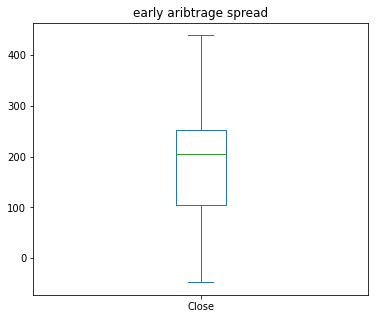

In [342]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot.box(figsize=(6,5),title="early aribtrage spread")

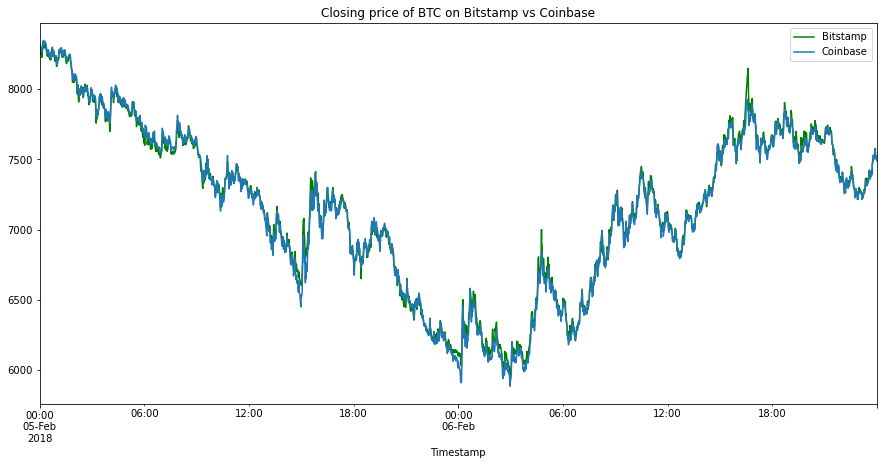

In [343]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-02-05':'2018-02-06'].plot(figsize = (15,7),color = "green", title = "Closing price of BTC on Bitstamp vs Coinbase")

coinbase_sliced.loc['2018-02-05':'2018-02-06'].plot(ax=ax)

ax.legend(['Bitstamp','Coinbase'])

In [344]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp_sliced.loc['2018-02-05':'2018-02-06'] - coinbase_sliced.loc['2018-02-05':'2018-02-06']


# Generate summary statistics 
arbitrage_spread_middle.describe()

count    2880.000000
mean       12.547490
std        33.879021
min       -80.990000
25%        -8.720000
50%         9.010000
75%        28.105000
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'middle aribtrage spread'}>

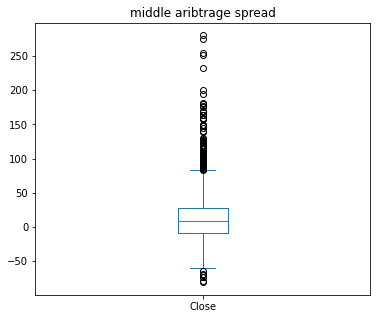

In [345]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot.box(figsize=(6,5),title="middle aribtrage spread")

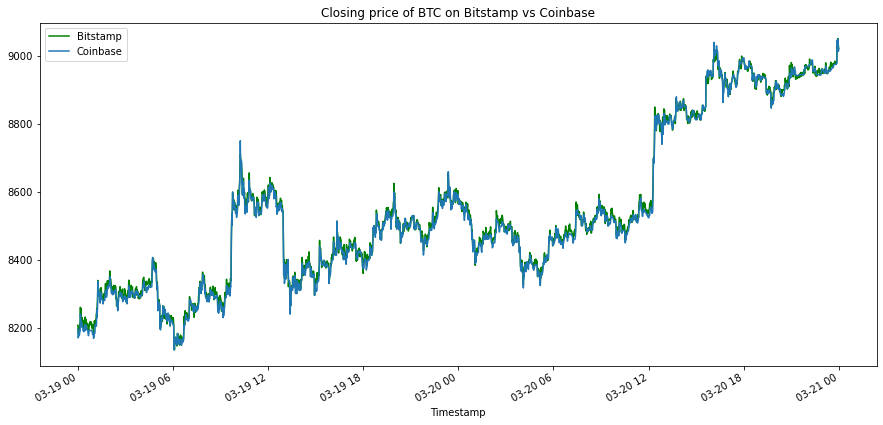

In [346]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
ax = bitstamp_sliced.loc['2018-03-19':'2018-03-20'].plot(figsize = (15,7),color = "green", title = "Closing price of BTC on Bitstamp vs Coinbase")

coinbase_sliced.loc['2018-03-19':'2018-03-20'].plot(ax=ax)

ax.legend(['Bitstamp','Coinbase'])

In [347]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc['2018-03-19':'2018-03-20'] - coinbase_sliced.loc['2018-03-19':'2018-03-20']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    2870.000000
mean        6.169906
std         9.478078
min       -39.610000
25%        -0.080000
50%         6.000000
75%        12.297500
max        59.950000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'later aribtrage spread'}>

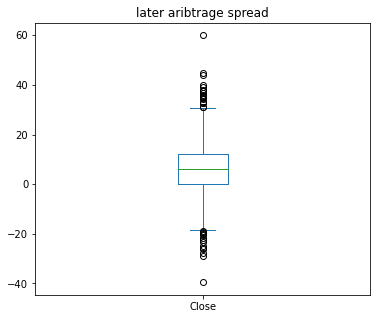

In [348]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot.box(figsize=(6,5),title="later aribtrage spread")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [349]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early > 0].describe()

count    2815.000000
mean      187.505375
std        97.509682
min         0.570000
25%       115.405000
50%       207.000000
75%       254.465000
max       439.010000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [350]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase_sliced.loc['2018-01-28':'2018-01-29']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-29 23:55:00    0.002155
2018-01-29 23:56:00         NaN
2018-01-29 23:57:00    0.001672
2018-01-29 23:58:00    0.000218
2018-01-29 23:59:00    0.000541
Name: Close, Length: 2880, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [351]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [352]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    2120.000000
mean        0.020659
std         0.005193
min         0.010021
25%         0.017271
50%         0.020342
75%         0.023714
max         0.038510
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [353]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase_sliced.loc['2018-01-28':'2018-01-29']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-29 12:24:00    116.54
2018-01-29 12:31:00    128.44
2018-01-29 12:33:00    121.93
2018-01-29 12:37:00    111.42
2018-01-29 12:39:00    112.75
Name: Close, Length: 2120, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [354]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    2120.000000
mean      233.909222
std        60.549811
min       111.200000
25%       193.502500
50%       229.115000
75%       270.050000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'early arbitrage profit potential on 1 day'}, xlabel='Timestamp'>

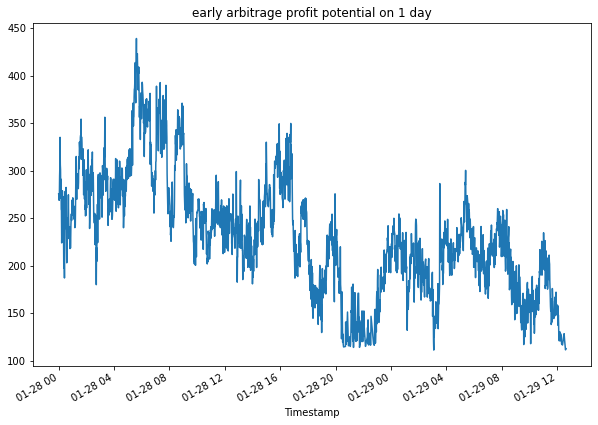

In [355]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10,7),title="early arbitrage profit potential on 1 day")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [356]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

495887.55000000005

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [357]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'profit/trade throughout the day - Early'}, xlabel='Timestamp'>

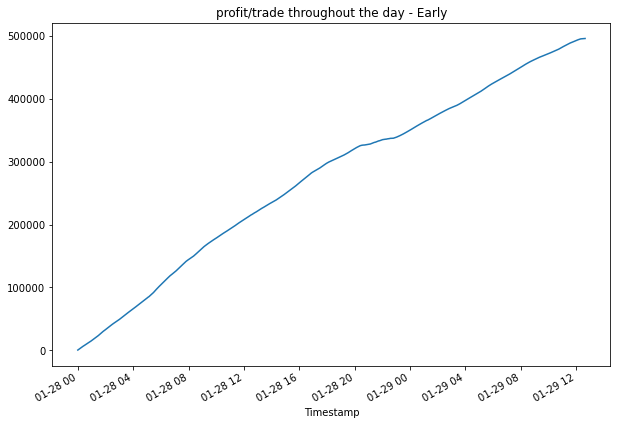

In [358]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,7),title='profit/trade throughout the day - Early')

########## MIDDLE



In [359]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle > 0].describe()

count    1802.000000
mean       30.158030
std        30.026021
min         0.010000
25%        11.025000
50%        21.980000
75%        39.590000
max       280.010000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [360]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase_sliced.loc['2018-02-05':'2018-02-06']

# Review the spread return DataFrame
spread_return_middle

Timestamp
2018-02-05 00:00:00         NaN
2018-02-05 00:01:00         NaN
2018-02-05 00:02:00         NaN
2018-02-05 00:03:00         NaN
2018-02-05 00:04:00         NaN
                         ...   
2018-02-06 23:55:00         NaN
2018-02-06 23:56:00         NaN
2018-02-06 23:57:00    0.003271
2018-02-06 23:58:00    0.001536
2018-02-06 23:59:00    0.003157
Name: Close, Length: 2880, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [361]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-05 13:29:00    0.010345
2018-02-05 14:41:00    0.010523
2018-02-05 14:43:00    0.012529
2018-02-05 14:44:00    0.014504
2018-02-05 14:47:00    0.011269
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [362]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    161.000000
mean       0.015278
std        0.005808
min        0.010084
25%        0.011107
50%        0.013546
75%        0.016650
max        0.037211
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [363]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase_sliced.loc['2018-02-05':'2018-02-06']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-05 13:29:00     71.57
2018-02-05 14:41:00     70.08
2018-02-05 14:43:00     83.57
2018-02-05 14:44:00     96.00
2018-02-05 14:47:00     74.84
                        ...  
2018-02-06 17:05:00     81.00
2018-02-06 19:39:00    119.18
2018-02-06 19:41:00     92.51
2018-02-06 19:46:00     94.79
2018-02-06 19:49:00    110.55
Name: Close, Length: 161, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [364]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_middle.describe()

count    161.000000
mean     101.561056
std       42.841874
min       61.120000
25%       70.110000
50%       88.470000
75%      118.660000
max      280.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'middle arbitrage profit potential on 1 day'}, xlabel='Timestamp'>

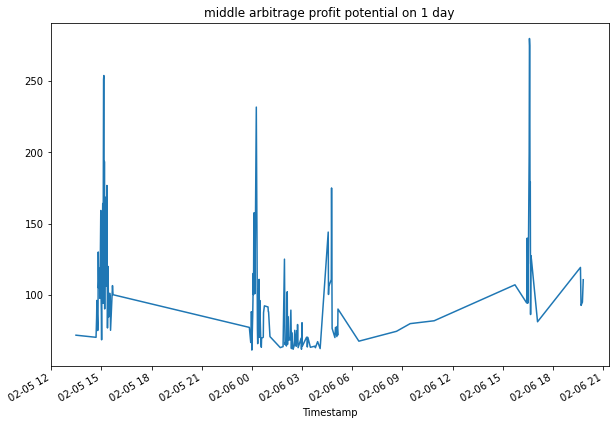

In [365]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10,7),title="middle arbitrage profit potential on 1 day")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [366]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_middle.sum()

16351.33

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [367]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'profit/trade throughout the day - Middle'}, xlabel='Timestamp'>

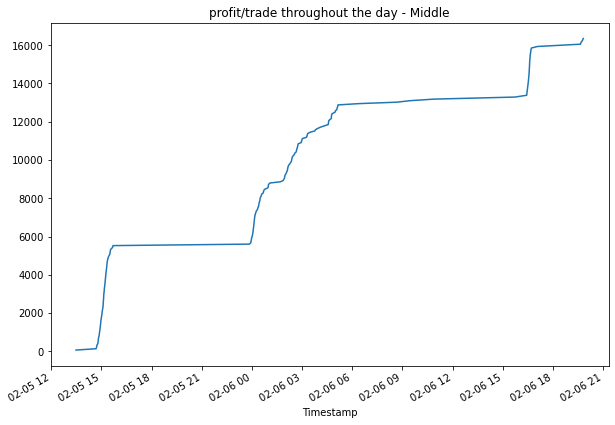

In [368]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10,7),title='profit/trade throughout the day - Middle')

########## LATE



In [369]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late > 0].describe()

count    2134.000000
mean       10.170403
std         7.052737
min         0.010000
25%         4.850000
50%         9.315000
75%        14.355000
max        59.950000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [370]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase_sliced.loc['2018-03-19':'2018-03-20']

# Review the spread return DataFrame
spread_return_late

Timestamp
2018-03-19 00:00:00    0.001375
2018-03-19 00:01:00    0.001198
2018-03-19 00:02:00    0.001324
2018-03-19 00:03:00    0.000898
2018-03-19 00:04:00    0.000900
                         ...   
2018-03-20 23:55:00    0.001233
2018-03-20 23:56:00    0.000185
2018-03-20 23:57:00         NaN
2018-03-20 23:58:00    0.001857
2018-03-20 23:59:00    0.000092
Name: Close, Length: 2880, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [371]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [372]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [373]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase_sliced.loc['2018-03-19':'2018-03-20']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [374]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'late arbitrage profit potential on 1 day'}, xlabel='Timestamp'>

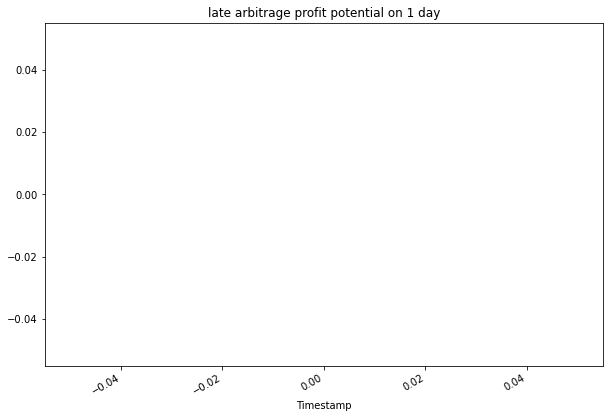

In [375]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10,7),title="late arbitrage profit potential on 1 day")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [376]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_late.sum()

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [377]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'profit/trade throughout the day - late'}, xlabel='Timestamp'>

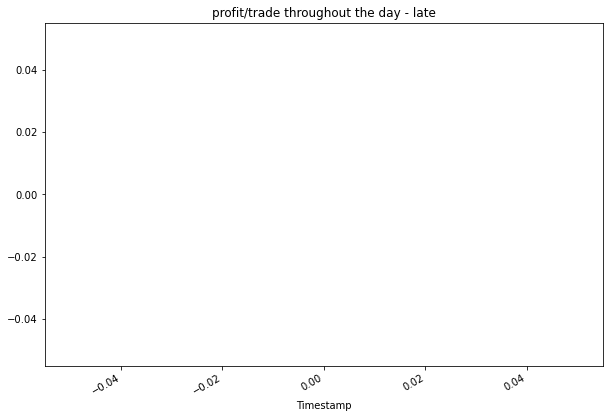

In [378]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10,7),title='profit/trade throughout the day - late')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The profit to be made through aribtrage opportunities across exchanges drops drastically over the time period we're working with. Profit opportunities where you can make where the return is >1% drops from 2,120 possible trades to 161 all the way down to 0 trades. In terms of total profits across the days chosen, the cumulative profit opportunity drops from $496k to $16k to $0